# Representing a Vector

In nengo, ensembles of neurons represent information. In this model, you will represent
a two-dimensional vector with a single ensemble of LIF (leaky integrate-and-fire)
neurons. Though this is a case of two-dimensional vector representation, but the ideas
naturally generalize to any dimension.

In [1]:
# Setup the environment
import numpy as np

import nengo
from nengo.dists import Uniform

## Create the Model

This model has parameters as described in the book, with the neurons in the ensemble
having two dimensions. Since the default max rates in Nengo 2.0 are (200, 400), so you
have to explicitly specify them to be (100, 200) to create the same model as in the
book. The default values of `tauRC`, `tauRef`, `intercepts`, `radius` and expected noise
in
Nengo 2.0 are same as those mentioned in the book.

In [2]:
# Create the network object to which we can add ensembles, connections, etc.
model = nengo.Network(label="2D Representation")

with model:
    # Inputs to drive the neural ensemble
    stim_sin = nengo.Node(output=np.sin, label="sin")
    stim_cos = nengo.Node(output=np.cos, label="cos")

    # Ensemble with 100 LIF neurons which represent a 2-dimensional signal
    x = nengo.Ensemble(100, dimensions=2, max_rates=Uniform(100, 200))

    # Get the neuron encoders
    encoders = x.encoders.sample(100, 2)

    # Connecting input stimulus to ensemble
    # The indices in ensemble 'x' define which dimension the input projects to
    nengo.Connection(stim_sin, x[0])
    nengo.Connection(stim_cos, x[1])

## Run the model

Import the `nengo_gui` visualizer to run and visualize the model.

In [ ]:
from nengo_gui.ipython import IPythonViz

IPythonViz(model, "ch2-vectors.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs
as shown in the figure below.

The `cos` and `sin` graphs show the two dimensional input provided to the ensemble and
the top right graph shows the the decoded estimate of this two dimensional input. The
graph on bottom right shows the XY-value i.e., the state represented by one dimension of
the ensemble vs the state represented by the other dimension.

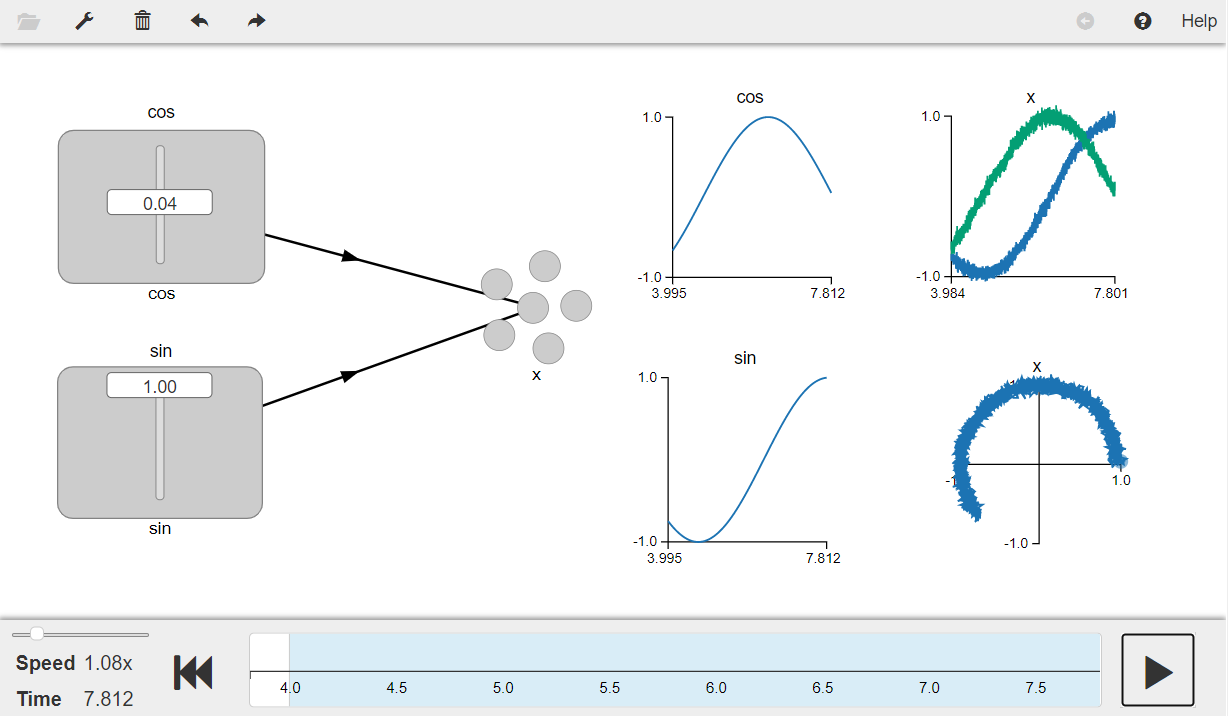

In [3]:
from IPython.display import Image

Image(filename="ch2-vectors.png")